In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # retina display
from ipywidgets import interactive


In [7]:
import warnings
warnings.filterwarnings('ignore')
# Q is the tune
# a and phi0 are the max amplitude and the phase of the turn=0 points
# Nturns are the turn number
# g is proportional to the sextupole gradient
# the code solve the simple Hénon map
# x[n+1] = x[n]
# xp[n+1]= xp[n]+g*x[n]^2
# and after I apply a pure rotation of Q

Q=1/4+.001
a=.05
Nturns=1000
Namplitude=20
g=-23
def f(Q, phi0,a,g,Nturns,Namplitude):
    plt.figure(figsize=(6,6))
    phi_rad=np.pi/180.*phi0
    
    phi=2*np.pi*Q

    R=np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]])
    R0=np.array([[np.cos(phi_rad),np.sin(phi_rad)],[-np.sin(phi_rad),np.cos(phi_rad)]])

    for j in np.linspace(0,a,Namplitude): 
        X=[]
        A=R0 @ np.array([[j],[0]])
        X.append(A )
        for i in range(Nturns):
            X.append(R @ (X[i]+g*np.array([[0],[X[i][0]*X[i][0]]])))
        plt.plot(np.array(X)[:,0],np.array(X)[:,1],'.', ms=1)

    plt.axis('square');

    plt.xlim(-a,a)
    plt.ylim(-a,a);
    plt.title('Q='+str(Q)+
              ', phi0='+str(phi0)+
              ', a='+str(a)+
              ', g='+str(g))
interactive_plot = interactive(f, Q=(0.0, 1.0, 0.001), phi0=(0, 360, 1), a=(0, .1, .0001),g=(-50,50,1),Nturns=(0,2000,1),Namplitude=(10,50,1),continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='Q', max=1.0, step=0.001), IntSlider(value=180, descr…

# DA concept

In [3]:
import pandas as pd
Q=1/4+.001
a=.05
Nturns=1000
Namplitude=50
g=-23
phi0=0
def f(Q, phi0,a,g,Nturns,Namplitude):
    aux=pd.DataFrame()
    phi_rad=np.pi/180.*phi0
    
    phi=2*np.pi*Q

    R=np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]])
    R0=np.array([[np.cos(phi_rad),np.sin(phi_rad)],[-np.sin(phi_rad),np.cos(phi_rad)]])

    for j in np.linspace(0,a,Namplitude): 
        X=[]
        Amplitude=[]
        A=R0 @ np.array([[j],[0]])
        X.append(A)
        Amplitude.append(np.sqrt(A[0]**2+A[1]**2)/2)
        for i in range(Nturns):
            X.append(R @ (X[i]+g*np.array([[0],[X[i][0]*X[i][0]]])))
            Amplitude.append(np.sqrt(X[i+1][0]**2+X[i+1][1]**2)/2)
        aux=pd.concat([aux,pd.DataFrame(np.array(Amplitude),columns=[j])], axis=1, sort=False)
    return aux
aux=f(Q, phi0,a,g,Nturns,Namplitude)


In [4]:

def f(Nturns):
    plt.plot(np.linspace(0,a,Namplitude),aux[0:Nturns].max(),'o')
    plt.ylim(0,.05)
    plt.xlim(0,.05)
    plt.grid()
    
interactive_plot = interactive(f,Nturns=(1,2000,1),continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=1000, description='Nturns', max=2000, min=1), Output(layout=Layout(heigh…

# Frequency locking

In [5]:

Q=1/4+.001
a=.028
Nturns=5000
Namplitude=200
g=-23
def f(Q, phi0,a,g,Nturns,Namplitude):
    aux=pd.DataFrame()
    phi_rad=np.pi/180.*phi0
    
    phi=2*np.pi*Q

    R=np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]])
    R0=np.array([[np.cos(phi_rad),np.sin(phi_rad)],[-np.sin(phi_rad),np.cos(phi_rad)]])

    for j in np.linspace(0,a,Namplitude): 
        X=[]
        Amplitude=[]
        A=R0 @ np.array([[j],[0]])
        X.append(A)
        Amplitude.append(np.sqrt(A[0]**2+A[1]**2)/2)
        for i in range(Nturns):
            X.append(R @ (X[i]+g*np.array([[0],[X[i][0]*X[i][0]]])))
            Amplitude.append(X[i+1][0])
        aux=pd.concat([aux,pd.DataFrame(np.array(Amplitude),columns=[j])], axis=1, sort=False)
    return aux
aux=f(Q, phi0,a,g,Nturns,Namplitude)

import PyNAFF as pnf


myQ=[]
for i in range(Namplitude)[1:]:
    signal = aux[aux.columns[i]].values;
    pnf.naff(signal, 500, 1, 0 , False, window=1)
    # outputs an array of arrays for each frequency. Each sub-array includes:
    # [order of harmonic, frequency, Amplitude, Re{Amplitude}, Im{Amplitude]


    # My frequency is simply 
    myQ.append(pnf.naff(signal, 5000, 1, 0 , False)[0][1])

In [6]:
def f(Nturns):
    myQ=[]
    for i in range(Namplitude)[1:]:
        signal = aux[aux.columns[i]].values;
        myQ.append(pnf.naff(signal, Nturns, 1, 0 , False)[0][1])
    plt.plot(np.linspace(0,a,Namplitude)[1:],myQ,'.-')
    myX=np.linspace(0,a,Namplitude)[1:]
    plt.plot(myX,Q*np.ones_like(myX),'-.r')
    plt.grid()
    plt.xlim(0,0.05)
    
interactive_plot = interactive(f,Nturns=(10,5000,1),continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#plt.ylim(.2499,.2501)

interactive(children=(IntSlider(value=2505, description='Nturns', max=5000, min=10), Output(layout=Layout(heig…

# Q optimization

In [301]:
DA_mm_at1000=[]
myQRange=np.linspace(0,1,100)
for Q in myQRange:
    print(Q)
    a=.05
    Nturns=1000
    Namplitude=20
    g=-23
    def f(Q, phi0,a,g,Nturns,Namplitude):
        aux=pd.DataFrame()
        phi_rad=np.pi/180.*phi0

        phi=2*np.pi*Q

        R=np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]])
        R0=np.array([[np.cos(phi_rad),np.sin(phi_rad)],[-np.sin(phi_rad),np.cos(phi_rad)]])

        for j in np.linspace(0,a,Namplitude): 
            X=[]
            Amplitude=[]
            A=R0 @ np.array([[j],[0]])
            X.append(A)
            Amplitude.append(np.sqrt(A[0]**2+A[1]**2)/2)
            for i in range(Nturns):
                X.append(R @ (X[i]+g*np.array([[0],[X[i][0]*X[i][0]]])))
                Amplitude.append(np.sqrt(X[i+1][0]**2+X[i+1][1]**2)/2)
            aux=pd.concat([aux,pd.DataFrame(np.array(Amplitude),columns=[j])], axis=1, sort=False)
        return aux
    aux=f(Q, phi0,a,g,Nturns,Namplitude)
    myMax=aux.max()
    DA_mm_at1000.append(max(myMax[myMax<.05].index))

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224
0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647
0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.51515

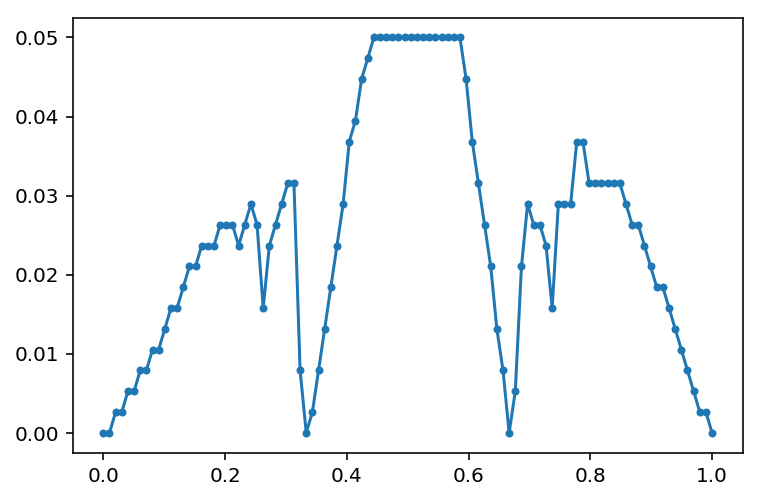

In [302]:
plt.plot(myQRange, DA_mm_at1000,'.-')

# Kick distribution

In [305]:
DA_mm_at1000=[]
myQRange=np.linspace(0,1,100)
for Q in myQRange:
    print(Q)
    a=.05
    Nturns=1000
    Namplitude=20
    g=-23
    
    def f(Q, phi0,a,g,Nturns,Namplitude):
        aux=pd.DataFrame()
        phi_rad=np.pi/180.*phi0

        phi=2*np.pi*Q/2
        g=g/2.
        R=np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]])
        R0=np.array([[np.cos(phi_rad),np.sin(phi_rad)],[-np.sin(phi_rad),np.cos(phi_rad)]])

        for j in np.linspace(0,a,Namplitude): 
            X=[]
            Amplitude=[]
            A=R0 @ np.array([[j],[0]])
            X.append(A)
            Amplitude.append(np.sqrt(A[0]**2+A[1]**2)/2)
            for i in range(Nturns):
                X1=R @ (X[i]+g*np.array([[0],[X[i][0]*X[i][0]]]))
                X.append(R @ (X1+g*np.array([[0],[X1[0]*X1[0]]])))
                Amplitude.append(np.sqrt(X[i+1][0]**2+X[i+1][1]**2)/2)
            aux=pd.concat([aux,pd.DataFrame(np.array(Amplitude),columns=[j])], axis=1, sort=False)
        return aux
    aux=f(Q, phi0,a,g,Nturns,Namplitude)
    myMax=aux.max()
    DA_mm_at1000.append(max(myMax[myMax<.05].index))

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224
0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647
0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.51515

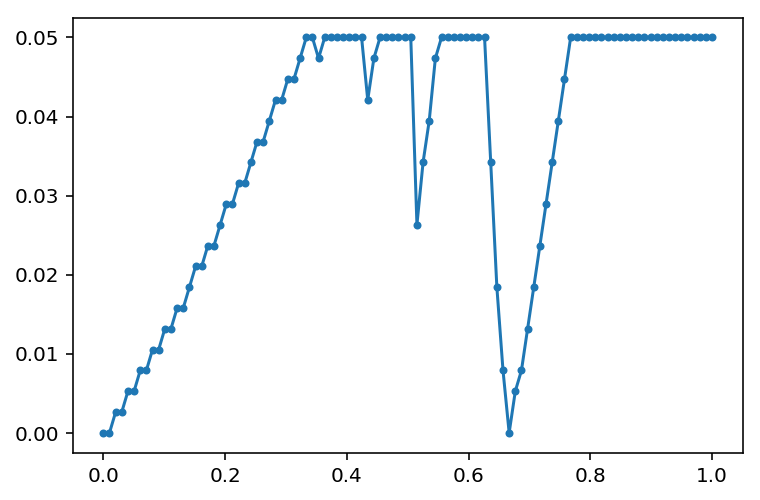

In [306]:
plt.plot(myQRange, DA_mm_at1000,'.-')

In [307]:
DA_mm_at1000=[]
myQRange=np.linspace(0,1,100)
for Q in myQRange:
    print(Q)
    a=.05
    Nturns=1000
    Namplitude=20
    g=-23
    
    def f(Q, phi0,a,g,Nturns,Namplitude):
        aux=pd.DataFrame()
        phi_rad=np.pi/180.*phi0

        phi=2*np.pi*Q/3.
        g=g/3.
        R=np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]])
        R0=np.array([[np.cos(phi_rad),np.sin(phi_rad)],[-np.sin(phi_rad),np.cos(phi_rad)]])

        for j in np.linspace(0,a,Namplitude): 
            X=[]
            Amplitude=[]
            A=R0 @ np.array([[j],[0]])
            X.append(A)
            Amplitude.append(np.sqrt(A[0]**2+A[1]**2)/2)
            for i in range(Nturns):
                X1=R @ (X[i]+g*np.array([[0],[X[i][0]*X[i][0]]]))
                X2=R @ (X1+g*np.array([[0],[X1[0]*X1[0]]]))
                X.append(R @ (X2+g*np.array([[0],[X2[0]*X2[0]]])))
                Amplitude.append(np.sqrt(X[i+1][0]**2+X[i+1][1]**2)/2)
            aux=pd.concat([aux,pd.DataFrame(np.array(Amplitude),columns=[j])], axis=1, sort=False)
        return aux
    aux=f(Q, phi0,a,g,Nturns,Namplitude)
    myMax=aux.max()
    DA_mm_at1000.append(max(myMax[myMax<.05].index))

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224
0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647
0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.51515

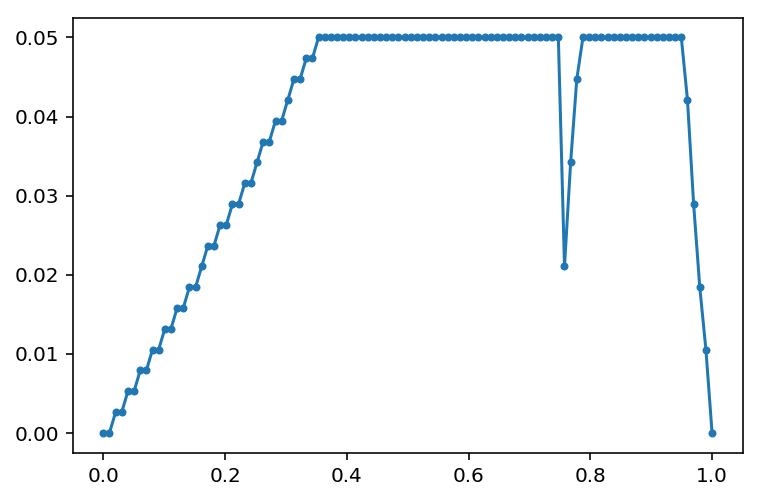

In [308]:
plt.plot(myQRange, DA_mm_at1000,'.-')